In [1]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Data Import
real_data=pd.read_csv(join('data','Seoul_public_bike.csv'), encoding='CP949')
real_data.head(2) #table로 보여주어 직관적이다.

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-09-02,13,212,212. 여의도역 1번출구 옆,정기권,F,70대~,3,123.3,1.11,4790,67
1,2019-09-13,12,279,279. 영등포 푸르지오 아파트,정기권,NaN,70대~,3,88.75,0.72,3070,26


## data preprocessing

In [3]:
genderless  = real_data.drop(real_data[real_data['성별'].notnull()].index)
gender = real_data
gender = gender.dropna(subset=['성별'])

In [4]:
dataset = gender[['성별','이용건수', '운동량', '탄소량','이동거리','사용시간']]
dataset.head(5)

,성별,이용건수,운동량,탄소량,이동거리,사용시간
0,F,3,123.3,1.11,4790,67
2,M,3,820.87,5.07,21820,168
3,F,3,21.11,0.19,820,74
4,F,2,472.59,3.08,13260,112
6,F,2,79.54,0.71,3090,15


In [5]:
dataset.shape

(433931, 6)

In [6]:
class_counts = dataset.groupby('성별').size()
print(class_counts)

성별
F    168698
M    264494
f       326
m       413
dtype: int64


In [7]:
dataset.loc[dataset['성별'] == 'f', '성별'] = 'F'
dataset.loc[dataset['성별'] == 'm', '성별'] = 'M'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
dataset.dtypes

성별      object
이용건수     int64
운동량     object
탄소량     object
이동거리     int64
사용시간     int64
dtype: object

In [9]:
idx_n = dataset[dataset['운동량']=='\\N'].index
dataset = dataset.drop(idx_n)
dataset['운동량'] = pd.to_numeric(dataset['운동량'])

In [10]:
idx_n = dataset[dataset['탄소량']=='\\N'].index
dataset = dataset.drop(idx_n)
dataset['탄소량'] = pd.to_numeric(dataset['탄소량'])

In [11]:
dataset['탄소량'] = pd.to_numeric(dataset['탄소량'] / dataset['이용건수'])
dataset['운동량'] = pd.to_numeric(dataset['운동량'] / dataset['이용건수'])
dataset['사용시간'] = pd.to_numeric(dataset['사용시간'] / dataset['이용건수'])
dataset['이동거리'] = pd.to_numeric(dataset['이동거리'] / dataset['이용건수'])
del dataset['이용건수']

In [12]:
correlations = dataset.corr(method='pearson')
print(correlations)

           운동량       탄소량      이동거리      사용시간
운동량   1.000000  0.981873  0.981873  0.209461
탄소량   0.981873  1.000000  1.000000  0.216580
이동거리  0.981873  1.000000  1.000000  0.216581
사용시간  0.209461  0.216580  0.216581  1.000000


In [13]:
%matplotlib inline 
#notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
import matplotlib.pyplot as plt

In [14]:
dataset.head(11)

,성별,운동량,탄소량,이동거리,사용시간
0,F,41.100000,0.370000,1596.666667,22.333333
2,M,273.623333,1.690000,7273.333333,56.000000
3,F,7.036667,0.063333,273.333333,24.666667
4,F,236.295000,1.540000,6630.000000,56.000000
6,F,39.770000,0.355000,1545.000000,7.500000
7,M,31.275000,0.285000,1215.000000,8.500000
8,F,18.020000,0.165000,700.000000,36.000000
10,F,27.800000,0.275000,1170.000000,30.000000
12,F,19.800000,0.230000,1000.000000,6.500000
13,F,22.265000,0.200000,865.000000,25.000000


In [15]:
dataset.dtypes

성별       object
운동량     float64
탄소량     float64
이동거리    float64
사용시간    float64
dtype: object

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_

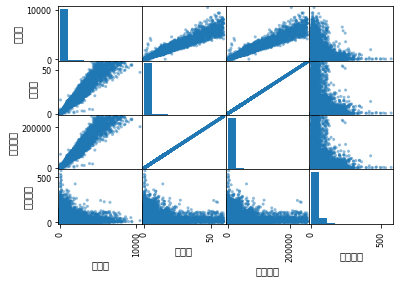

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show()

In [17]:
test = dataset.iloc[-100:,:]
train = dataset.iloc[:-100,:]

print(dataset.shape)
print(test.shape)
print(train.shape)

(432447, 5)
(100, 5)
(432347, 5)


In [18]:
# 혹은 scikit learn에서 제공해주는 함수를 사용할 수도 있음
## )r you can use just this 
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(train.iloc[:,1:], train.iloc[:,0], test_size=0.3, random_state=123)

In [19]:
from sklearn.preprocessing import LabelEncoder

encoder =  LabelEncoder()
y1 = encoder.fit_transform(trny)
trny = pd.get_dummies(y1).values
trny

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

In [20]:
encoder =  LabelEncoder()
y1 = encoder.fit_transform(tsty)
tsty = pd.get_dummies(y1).values
tsty

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

In [21]:
trnx.shape, tstx.shape, trny.shape, tsty.shape

((302642, 4), (129705, 4), (302642, 2), (129705, 2))

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
trnx = scaler.fit_transform(trnx)
tstx = scaler.transform(tstx)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(10, kernel_initializer='uniform',input_shape=(4,),activation='relu'))
model.add(Dense(20, kernel_initializer='uniform',activation='relu'))
model.add(Dense(10, kernel_initializer='uniform',activation='relu'))
model.add(Dense(2, kernel_initializer='uniform',activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________


In [24]:
hist = model.fit(trnx, trny, validation_data=(tstx, tsty), batch_size=10, epochs=50)

Train on 302642 samples, validate on 129705 samples
Epoch 1/50
302642/302642 [==============================] - 81s 267us/sample - loss: 0.6395 - accuracy: 0.6360 - val_loss: 0.5704 - val_accuracy: 0.7019
Epoch 2/50
302642/302642 [==============================] - 88s 291us/sample - loss: 0.5097 - accuracy: 0.7594 - val_loss: 0.4885 - val_accuracy: 0.7607
Epoch 3/50
302642/302642 [==============================] - 99s 327us/sample - loss: 0.4964 - accuracy: 0.7660 - val_loss: 0.4692 - val_accuracy: 0.7933
Epoch 4/50
302642/302642 [==============================] - 81s 267us/sample - loss: 0.4834 - accuracy: 0.7710 - val_loss: 0.4555 - val_accuracy: 0.7945
Epoch 5/50
302642/302642 [==============================] - 91s 301us/sample - loss: 0.4730 - accuracy: 0.7723 - val_loss: 0.5627 - val_accuracy: 0.7390
Epoch 6/50
302642/302642 [==============================] - 81s 268us/sample - loss: 0.4661 - accuracy: 0.7748 - val_loss: 0.5070 - val_accuracy: 0.7226
Epoch 7/50
302642/302642 [====

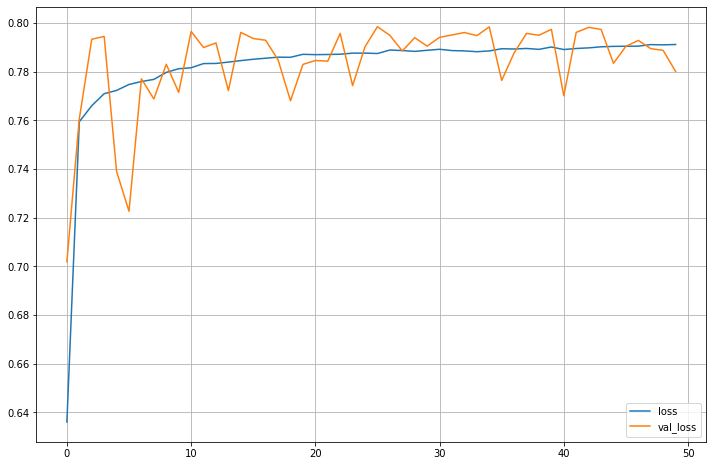

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.grid()
plt.show()

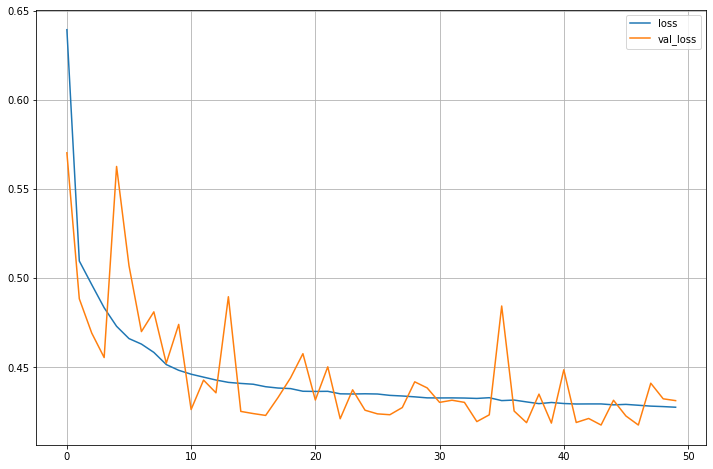

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.grid()
plt.show()

## 30개의 test data를 이용해 예측이 잘 되는지 정확도 확인

In [27]:
test_x = test.iloc[:,1:]
test_y = test.iloc[:,0]

In [28]:
encoder =  LabelEncoder()
y1 = encoder.fit_transform(test_y)
test_y = pd.get_dummies(y1).values

In [29]:
test_x = scaler.transform(test_x)

In [30]:
loss, accuracy = model.evaluate(test_x, test_y)
print("Accuracy = {:.2f}".format(accuracy))

100/100 [==============================] - 0s 66us/sample - loss: 0.6354 - accuracy: 0.6600
Accuracy = 0.66


In [31]:
from sklearn.metrics import accuracy_score
pred_out = model.predict(test_x)

real =[]
pred_out_idex=[]
class_names=['F','M']

for i,pred in zip(range(0, len(pred_out)), pred_out) :
    print("Predict :",class_names[np.argmax(pred)], ", Real :", class_names[test_y[i,1]])
    real.append(class_names.index(class_names[test_y[i,1]]))
    pred_out_idex.append(np.argmax(pred))
    
# get the accuracy
print (accuracy_score(real, pred_out_idex))

Predict : M , Real : M
Predict : M , Real : M
Predict : F , Real : M
Predict : M , Real : M
Predict : M , Real : M
Predict : F , Real : M
Predict : M , Real : M
Predict : M , Real : M
Predict : M , Real : F
Predict : M , Real : F
Predict : M , Real : F
Predict : M , Real : M
Predict : F , Real : M
Predict : M , Real : F
Predict : F , Real : F
Predict : F , Real : F
Predict : F , Real : F
Predict : F , Real : F
Predict : F , Real : F
Predict : M , Real : F
Predict : M , Real : M
Predict : F , Real : M
Predict : M , Real : M
Predict : F , Real : M
Predict : M , Real : M
Predict : F , Real : F
Predict : F , Real : F
Predict : F , Real : F
Predict : F , Real : M
Predict : F , Real : F
Predict : M , Real : F
Predict : F , Real : F
Predict : F , Real : F
Predict : M , Real : F
Predict : F , Real : F
Predict : F , Real : F
Predict : M , Real : M
Predict : M , Real : M
Predict : M , Real : M
Predict : F , Real : M
Predict : M , Real : M
Predict : M , Real : M
Predict : M , Real : M
Predict : F

### 성별이 없는 데이터를 input으로 이용해 성별 측정 후 기존 데이터와 합쳐 csv파일 생성

In [32]:
idx_n = genderless[genderless['운동량']=='\\N'].index
genderless = genderless.drop(idx_n)
genderless['운동량'] = pd.to_numeric(genderless['운동량'])

In [33]:
idx_n = genderless[genderless['탄소량']=='\\N'].index
genderless = genderless.drop(idx_n)
genderless['탄소량'] = pd.to_numeric(genderless['탄소량'])

In [44]:
pred_dataset = genderless[['성별','이용건수', '운동량', '탄소량','이동거리','사용시간']]
pred_dataset.head(5)

,성별,이용건수,운동량,탄소량,이동거리,사용시간
1,F,3,88.75,0.72,3070,26
5,F,2,57.74,0.56,2430,33
9,F,2,5843.38,42.79,184450,97
11,F,2,106.44,1.04,4480,40
23,F,2,3129.86,26.20,112910,106


In [45]:
pred_dataset.shape

(564216, 6)

In [46]:
pred_dataset['탄소량'] = pd.to_numeric(pred_dataset['탄소량'] / pred_dataset['이용건수'])
pred_dataset['운동량'] = pd.to_numeric(pred_dataset['운동량'] / pred_dataset['이용건수'])
pred_dataset['사용시간'] = pd.to_numeric(pred_dataset['사용시간'] / pred_dataset['이용건수'])
pred_dataset['이동거리'] = pd.to_numeric(pred_dataset['이동거리'] / pred_dataset['이용건수'])
del pred_dataset['이용건수']

/home/una/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/una/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/una/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [47]:
pred_dataset = pred_dataset.iloc[:,1:]

In [48]:
pred_out_data = model.predict(pred_dataset)

In [49]:
pred_out_class = []
for i,pred in zip(range(0, len(pred_out_data)), pred_out_data) :
    pred_out_class.append(class_names[np.argmax(pred)])

In [50]:
pred_out_class = np.array(pred_out_class)

In [51]:
genderless['성별'] = pred_out_class.T

In [52]:
pred_gender_data = np.concatenate((gender,genderless),axis=0)

In [53]:
header=['대여일자','대여시간','대여소번호','대여소명','대여구분코드','성별','연령대코드','이용건수','운동량','탄소량','이동거리','사용시간']
dataframe = pd.DataFrame(pred_gender_data)
dataframe.to_csv("공공자전거 이용정보_성별예측2.csv",header=header, index=False, encoding='utf-8-sig')